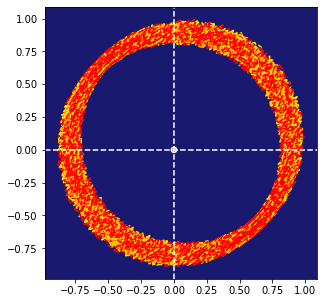

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random
 
angle = np.linspace(0,2*np.pi,180)
np.random.seed(42)
 
radius = 0.8
 
figure, axes = plt.subplots(1,figsize=(5,5))
axes.set_facecolor('midnightblue')
for i in range(0,100):
    noise = np.reshape(np.random.rand(1,len(angle)),-1)*0.1
    offset = np.reshape(np.random.rand(1,1),-1)*0.1
    x = (radius+offset)*np.cos(angle)+noise
    y = (radius+offset)*np.sin(angle)+noise
    axes.plot(x,y,linestyle="dashed",color=random.choice(('red','gold')))
axes.set_aspect(1)


radius=0.02
x = (radius)*np.cos(angle)
y = (radius)*np.sin(angle)
axes.plot(x,y,color="white")
plt.axvline(x=0,color="white",linestyle="dashed")
plt.axhline(y=0,color="white",linestyle="dashed")

In [2]:
A = np.random.rand(1,10)

In [3]:
random.choice(('red','gold'))

'gold'

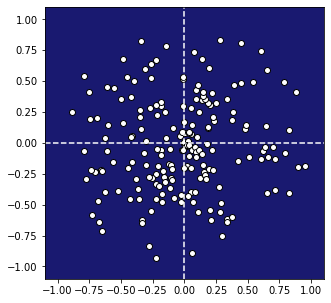

In [1]:
import numpy as np
import matplotlib.pyplot as plt


class Sonar(object):
    def __init__(self):
        np.random.seed(None)
        self.figure, self.axes = plt.subplots(1,figsize=(5,5))
        self.axes.set_facecolor('midnightblue')
        self.angle_length = 360
        plt.axvline(x=0,color="white",linestyle="dashed")
        plt.axhline(y=0,color="white",linestyle="dashed")
    
    def plot_circle(self,radius:int,angle:np.array):
        x = [radius*np.cos(ang) for ang in angle if ang>0]
        y = [radius*np.sin(ang) for ang in angle if ang>0]
        # x = (radius)*np.cos(angle)
        # y = (radius)*np.sin(angle)
        plt.xlim(-1.1,1.1)
        plt.ylim(-1.1,1.1)
        self.axes.scatter(x,y,color="white",edgecolors="black")
    
    def rand_angle(self,sample_size:int,p:np.array):
        self.angle = np.linspace(0,2*np.pi,self.angle_length)
        list_index = np.random.choice(np.arange(len(self.angle)),size=sample_size,p=p)
        out_angle = np.zeros(len(self.angle))
        for i in list_index:
            out_angle[i] = self.angle[i]
        return out_angle
    
    def make_P(self,thickness:int,offset:int):
        """
        thickness: 1 = sparse, >1 = dense
        offset: 0-359 degrees
        """
        P = np.zeros(self.angle_length)
        P[offset:offset+(self.angle_length//thickness)] = 1
        P = P*1/(np.count_nonzero(P==1))
        return P
    
    def make_matrix(self,thickness:int,offset:int):
        """
        thickness: 1 = sparse, >1 = dense
        offset: 0-359 degrees
        """
        U = np.zeros(self.angle_length)
        for i in range(0,100):
            size = np.random.randint(5)
            P = self.make_P(thickness=1,offset=0)
            angle = s.rand_angle(sample_size=size,p=P)
            U = np.vstack((U,angle))
        U = np.delete(U,0,0)
        return
    
    def make_Noise(self):
        pass
    
    
s = Sonar()
max_steps = 100 # number of concentric rings
resolution = 10 # for visualization, in % 
for i in range(0,max_steps):
    size = np.random.randint(5)
    P = s.make_P(thickness=1,offset=0)
    angle = s.rand_angle(sample_size=size,p=P)
    s.plot_circle(radius=i/(10*resolution),angle=angle)

s.make_matrix(thickness=1,offset=0)